<a href="https://colab.research.google.com/github/AliMahdavifar/PCA_MNIST_dataset/blob/main/Ali_Mahdavifar_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3**, APS1070 Fall 2020
#### **PCA**


*   **Name**: **Ali Mahdavifar**



We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1-4**.
* The second Covid-19 dataset reports the total number of deaths for each country at the end of each day. We use this dataset in **Part 4**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 5**.

# Part 1: Getting started

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. 
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. 
3. Plot the standardized time-series for the same countries as you chose in `Step 1`. 
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. Why does it mean if the curve goes up or down? What do negative and positive values mean? 



> **The trends and rates between the actual results and the scaled resutls remain the same. Negative values corrospond to the dates that had fewer cases reported, while the positive values would mean a surplus of cases with respect to the average. When the cruve plateaus as in the case with China, it means the number of cases are held at a constant number and the average is usallully withing the date range where the plateau occurs. When the curve goes up, that means it is a scaled increase with respect to the average total number of cases; vice versa for decrease.**


In [ ]:
cases_raw

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24471,25142,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151,36580,37083,37591,37963,38253,38703,39121,39541,39899,40322,40766,41078,41498,41957,42432,42840,43256,43664,43945,44299,44684
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1979,1983,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028,2028,2029,2029,2029,2030,2030,2031,2031,2034,2039,2040,2041,2041,2041,2047,2049,2050,2051,2051,2052,2052
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12523,12639,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175,14389,14443,14491,14515,14612,14641,14660,14715,14759,14802,14830,14974,15052,15089,15170,15224,15301,15339,15415,15458,15549


In [ ]:
## Plot the time-series data for 10 countries
import numpy as np
import matplotlib.pyplot as plt

arr = ["US", "China", "Canada", "Italy", "Iran", "Spain", "Norway", "New Zealand", "Russia", "Egypt"]
X_filtered = cases_raw.loc[arr,:].values
col = list(cases_raw.columns.values)


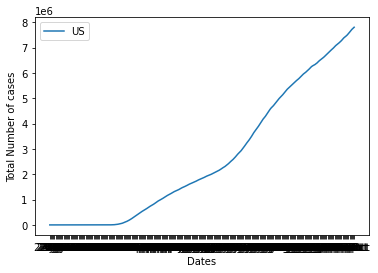

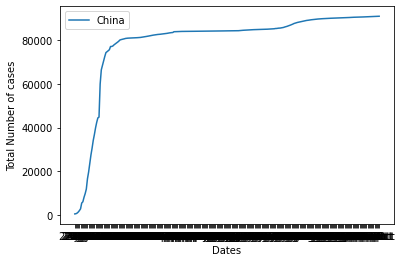

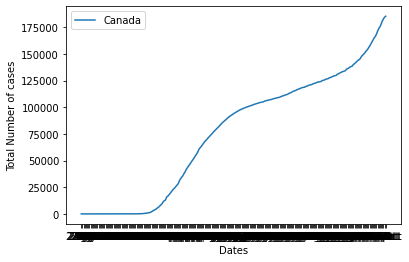

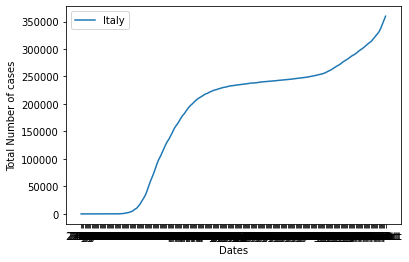

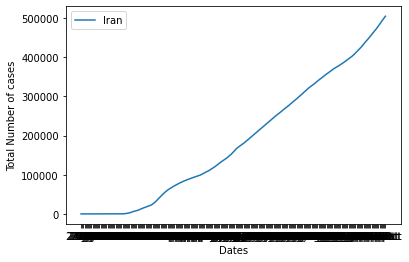

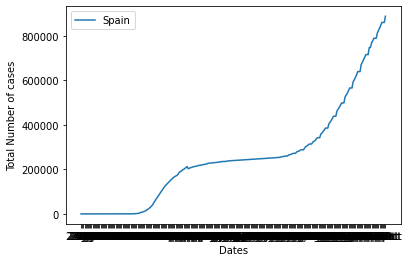

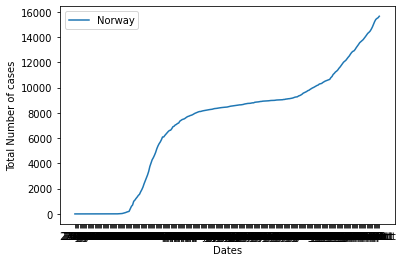

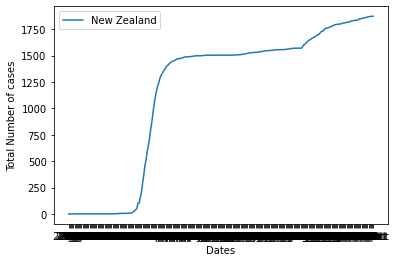

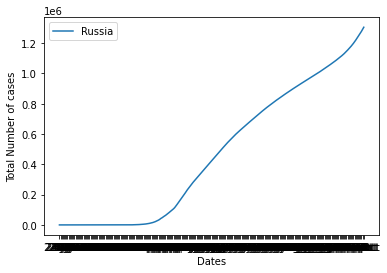

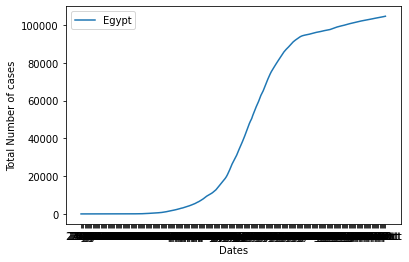

In [ ]:
# fig, ax = plt.subplots()
for i in range(0, X_filtered.shape[0]):
    fig, ax = plt.subplots()
    ax.plot(col, X_filtered[i], label = arr[i])
    plt.legend(loc='upper left')
    plt.xlabel("Dates")
    plt.ylabel("Total Number of cases")
    

In [ ]:
from sklearn.preprocessing import StandardScaler

X = cases_raw.loc[:,:]
# define standard scalar
scalar = StandardScaler()
# transform data
X_scaled = scalar.fit_transform(np.transpose(X))
X_filtered_scaled = scalar.fit_transform(np.transpose(X_filtered))

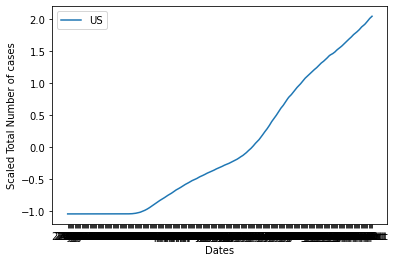

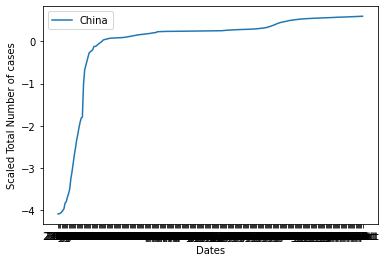

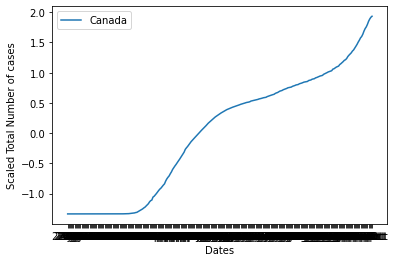

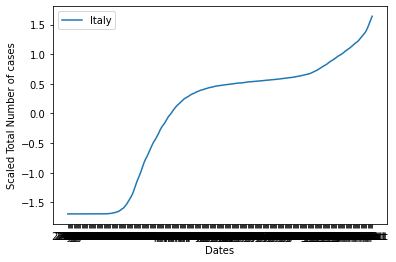

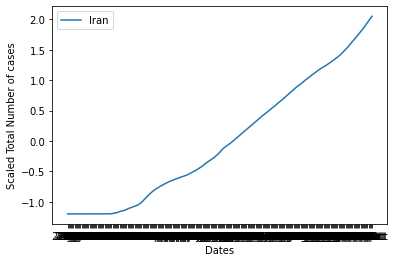

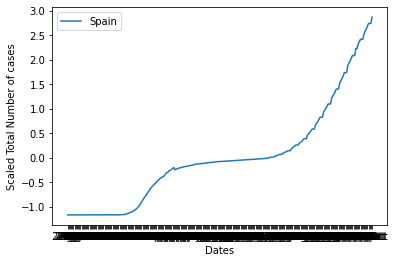

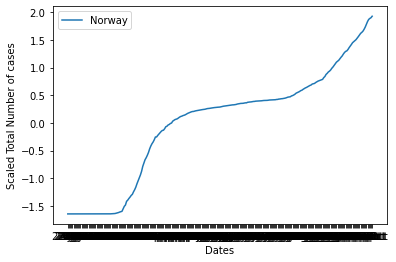

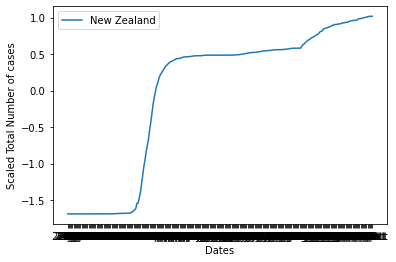

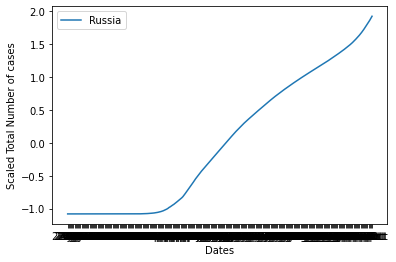

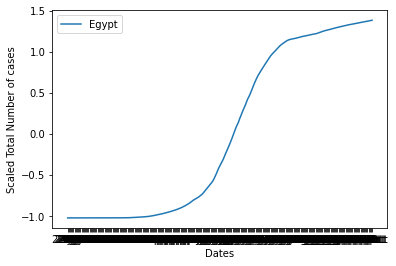

In [ ]:
for i in range(0, X_filtered_scaled.shape[1]):
    fig, ax = plt.subplots()
    ax.plot(col, X_filtered_scaled[:,i], label = arr[i])
    plt.legend(loc='upper left')
    plt.xlabel("Dates")
    plt.ylabel("Scaled Total Number of cases")

# Part 2: Applying PCA

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (265, 265).* 
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. 
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. 
4. How many PCs do you need to cover 99\% of the dataset's variance? 


> **Number of PCs needed cover 99% percent of dataset variance is 6**


5. Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots). 
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? 


> **The higher the PC, the more osciallation we observe on the plots. The frequency of those oscillations increase with PC. This show that the higher PCs are more sensitive to noise on top of the main variation of data that is covered by the first few PCs.**



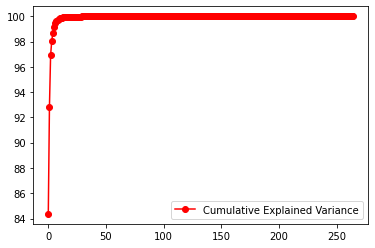

Number of PCs needed to cover 99% percent of dataset variance is 6


In [ ]:
# Compute covariance matrix
n, m = X_scaled.shape

C = np.dot(X_scaled, X_scaled.T) / (n-1) 
C.shape

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
eigenValues.shape

eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)


# plt.bar(range(eigenValues.shape[0]), expVar, label='Explained Variance')
plt.plot(cumExpVar.real, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()


print("Number of PCs needed to cover 99%% percent of dataset variance is %.0f" \
      %(cumExpVar[cumExpVar<= 99.2].shape))


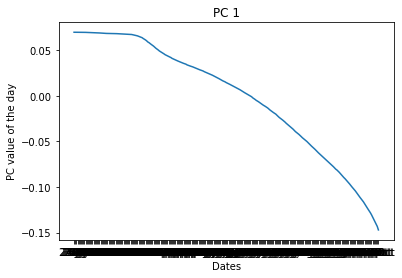

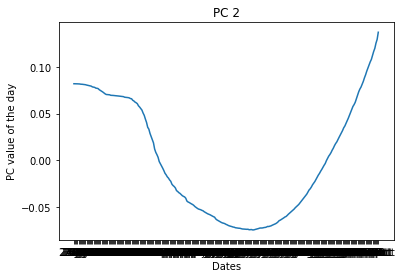

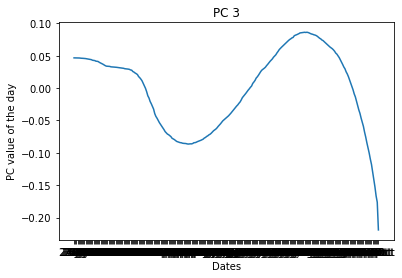

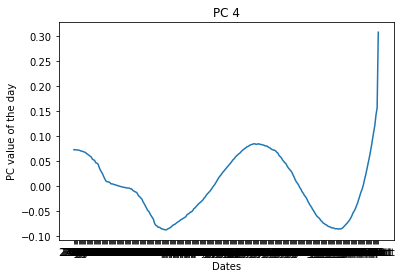

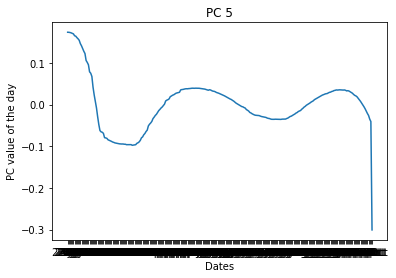

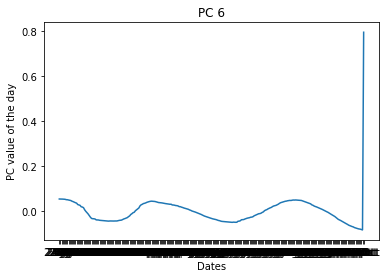

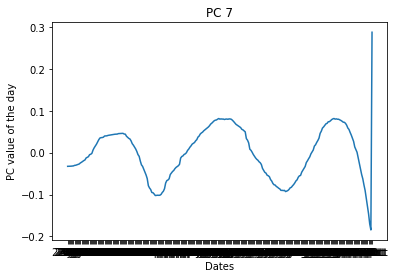

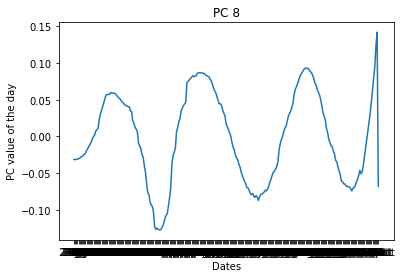

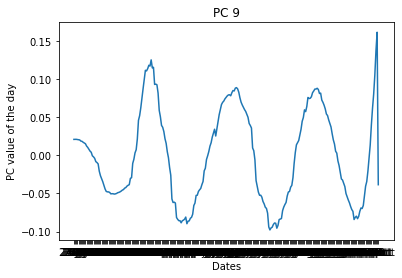

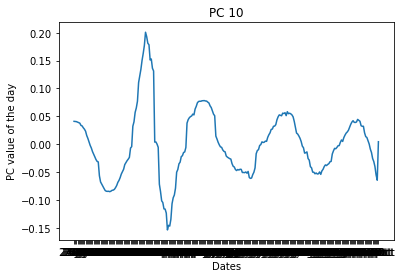

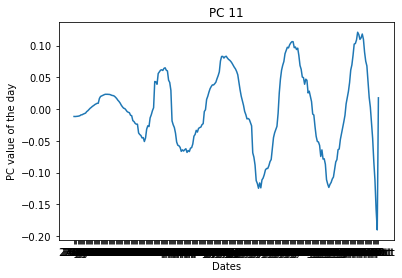

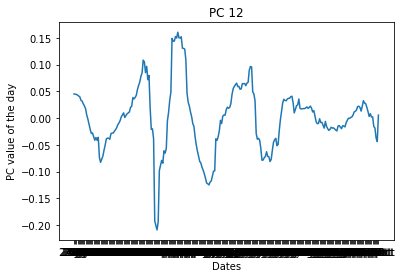

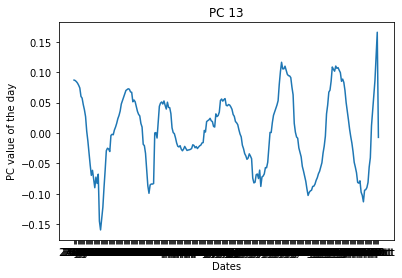

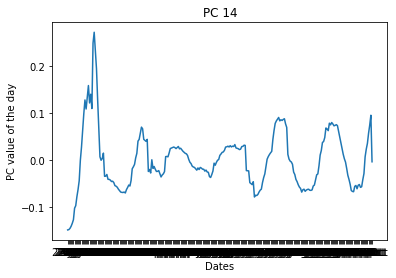

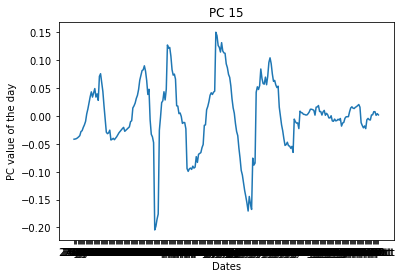

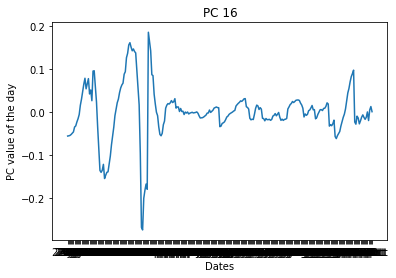

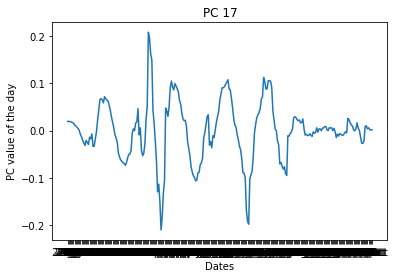

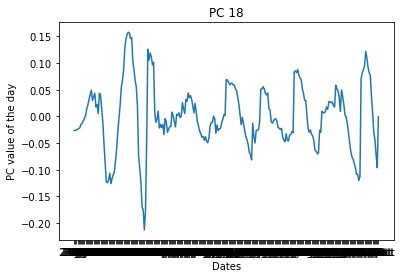

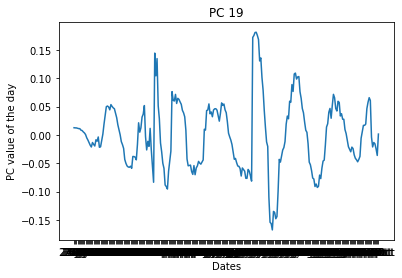

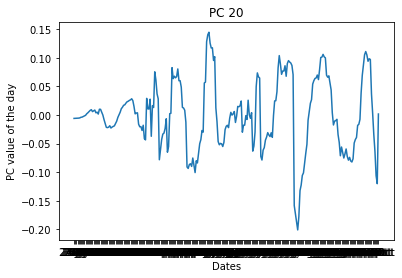

In [ ]:
# plot eigenvectors for each day

for i in range(0, 20):
    fig, ax = plt.subplots()
    ax.plot(col, eigenVectors[:,i].real)
    plt.xlabel("Dates")
    plt.ylabel("PC value of the day")
    plt.title("PC %i" %(i+1))


# Part 3: Data reconstruction 

Create a function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   The standardized time-series for the specified country.
2.   The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). 
3.   The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series. 
4.   The RMSE of reconstruction as a function of number of included components. 

*   Prints how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$. 

Test your function using the `US`, `Canada`, and `China` as inputs. 




> 2 many PCs are required to reach an RMSE of 1.00 for China

> 4 many PCs are required to reach an RMSE of 0.10 for China

> 5 many PCs are required to reach an RMSE of 0.01 for China

____________________________________________________________________
> 3 many PCs are required to reach an RMSE of 1.00 for US

> 5 many PCs are required to reach an RMSE of 0.10 for US

> 8 many PCs are required to reach an RMSE of 0.01 for US

____________________________________________________________________
> 1 many PCs are required to reach an RMSE of 1.00 for Canada

> 3 many PCs are required to reach an RMSE of 0.10 for Canada

> 7 many PCs are required to reach an RMSE of 0.01 for Canada









In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def reconstrcutData(country, cases_raw):
  # retrieve data for the specified country
  try:
    x = cases_raw.loc[:].values
  except KeyError:
    print("country name not found! Enter a valid name.")
  except ValueError:
    print("Something went wrong in the code. Check data reshaping.")

  x_scaled = StandardScaler().fit_transform(x)
  index_arr = cases_raw.index.values
  country_index = np.where(index_arr == country)[0][0]
  col = list(cases_raw.columns.values)
  error = np.array([[0]*cases_raw.shape[1]]*cases_raw.shape[0])

  # Plot standardized time-series data
  x_scaled_country = x_scaled[country_index, :]

  fig, ax = plt.subplots()
  ax.plot(col, x_scaled_country)
  plt.xlabel("Dates")
  plt.ylabel("Scaled Total Number of cases")
  plt.title(country)

  n, m = x_scaled.shape
  C = np.dot(x_scaled.T, x_scaled) / (m-1) 

  # Eigen decomposition
  eigenValues, eigenVectors = np.linalg.eig(C) 
  eigValSum = sum(eigenValues)
  expVar = [eigV/eigValSum*100 for eigV in eigenValues]
  cumExpVar = np.cumsum(expVar)

  # plot reconstructed data
  fig, ax = plt.subplots()
  PC_count = 10

  for i in range(0, PC_count):
    W = eigenVectors[:,0:i+1]
    projX = np.dot(x_scaled, W)
    ReconX = np.dot(projX, W.T)
    ax.plot(col, ReconX[country_index,:].real, label = "%i" %(i+1))
    plt.xlabel("Dates")
    plt.ylabel("Reconstrcuted Data from Accumulated PCs")

  plt.title(country)
  plt.legend(title = "# of PCs")

  # plot residual error
  fig, ax = plt.subplots()
  for i in range(0, PC_count):
    W = eigenVectors[:,0:i+1]
    projX = np.dot(x_scaled, W)
    ReconX = np.dot(projX, W.T)
    error = abs(x_scaled - ReconX)
    ax.plot(col, error[country_index,:].real, label = "%i" %(i+1))
    plt.xlabel("Dates")
    plt.ylabel("Residual Error")

  plt.title(country)
  plt.legend(title = "# of PCs")

  # plot RMSE
  fig, ax = plt.subplots()
  rmse_arr = [0]*PC_count

  for i in range(0, PC_count):
    W = eigenVectors[:,0:i+1]
    projX = np.dot(x_scaled, W)
    ReconX = np.dot(projX, W.T)
    rmse_arr[i] = rmse(x_scaled[country_index,:], ReconX[country_index,:]).real

  ax.plot(range(1, PC_count+1), rmse_arr)
  plt.xlabel("Total Nummber of PCs")
  plt.ylabel("RMSE")

  plt.title(country)


  def rmse_threshold(threshold):
      rmse_val = 100
      count = 0;
      while (rmse_val >= threshold):
        count = count + 1
        W = eigenVectors[:,0:count]
        projX = np.dot(x_scaled, W)
        ReconX = np.dot(projX, W.T)
        rmse_val = rmse(x_scaled[country_index,:], ReconX[country_index,:])

      return count

  thresholds = [1, 0.1, 0.01]
  for threshold in thresholds:
    res = rmse_threshold(threshold)
    print("%i many PCs are required to reach an RMSE of %.2f for %s" \
          %(res, threshold, country))
    print("------------------------------------------------------------------")
  print("____________________________________________________________________")

  
    

def rmse(actual, reconstructed):
  return np.sqrt(((reconstructed - actual) ** 2).mean())

2 many PCs are required to reach an RMSE of 1.00 for China
------------------------------------------------------------------
4 many PCs are required to reach an RMSE of 0.10 for China
------------------------------------------------------------------
5 many PCs are required to reach an RMSE of 0.01 for China
------------------------------------------------------------------
____________________________________________________________________
3 many PCs are required to reach an RMSE of 1.00 for US
------------------------------------------------------------------
5 many PCs are required to reach an RMSE of 0.10 for US
------------------------------------------------------------------
8 many PCs are required to reach an RMSE of 0.01 for US
------------------------------------------------------------------
____________________________________________________________________
1 many PCs are required to reach an RMSE of 1.00 for Canada
-------------------------------------------------------

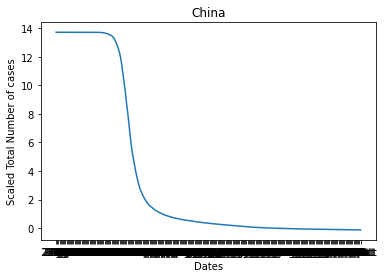

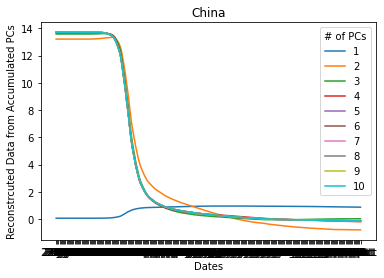

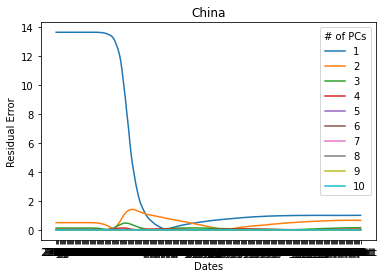

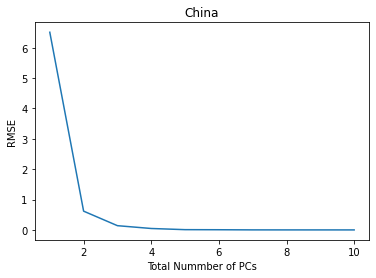

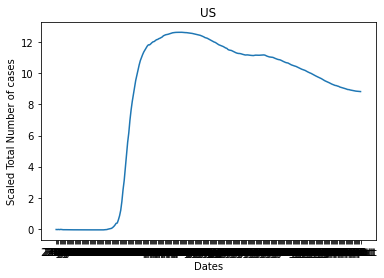

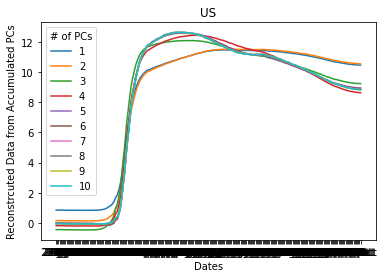

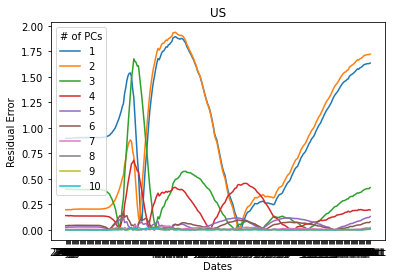

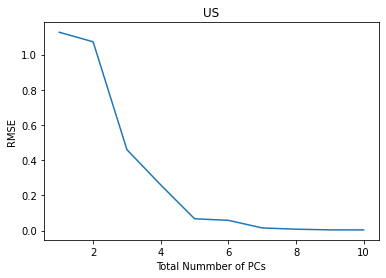

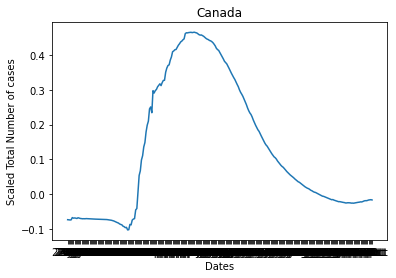

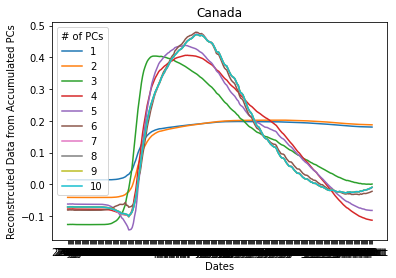

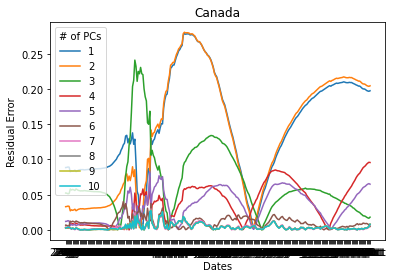

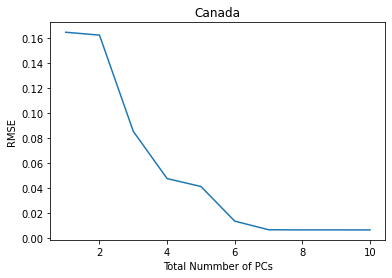

In [ ]:
# Plot results for specified countries
countries = ["China", "US", "Canada"]

for country in countries:
  reconstrcutData(country, cases_raw)

# Part 4: Time-series analysis on death cases
Here we'll use another dataset for total deaths caused by COVID-19 for different countries. 

Call the function that you designed in *Part 3* with this new dataset. To do that you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2)  and prepare the data for calling the Part 3 function. Test your function with the new dataset, with the `US`, `Canada`, and `China`. 



> **I do all the data processing in my function**

> 2 many PCs are required to reach an RMSE of 1.00 for China

> 4 many PCs are required to reach an RMSE of 0.10 for China

> 5 many PCs are required to reach an RMSE of 0.01 for China

____________________________________________________________________
> 2 many PCs are required to reach an RMSE of 1.00 for US

> 6 many PCs are required to reach an RMSE of 0.10 for US

> 8 many PCs are required to reach an RMSE of 0.01 for US

____________________________________________________________________
> 1 many PCs are required to reach an RMSE of 1.00 for Canada

> 5 many PCs are required to reach an RMSE of 0.10 for Canada

> 11 many PCs are required to reach an RMSE of 0.01 for Canada



In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

2 many PCs are required to reach an RMSE of 1.00 for China
------------------------------------------------------------------
4 many PCs are required to reach an RMSE of 0.10 for China
------------------------------------------------------------------
5 many PCs are required to reach an RMSE of 0.01 for China
------------------------------------------------------------------
____________________________________________________________________
2 many PCs are required to reach an RMSE of 1.00 for US
------------------------------------------------------------------
6 many PCs are required to reach an RMSE of 0.10 for US
------------------------------------------------------------------
8 many PCs are required to reach an RMSE of 0.01 for US
------------------------------------------------------------------
____________________________________________________________________
1 many PCs are required to reach an RMSE of 1.00 for Canada
-------------------------------------------------------

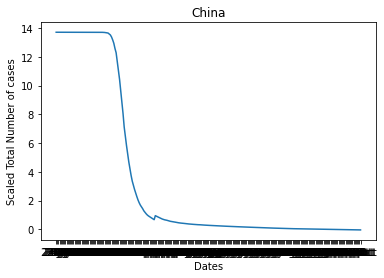

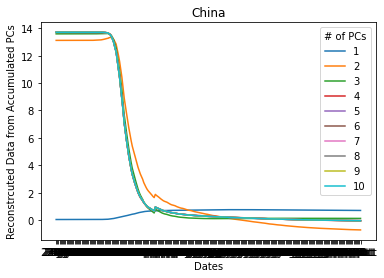

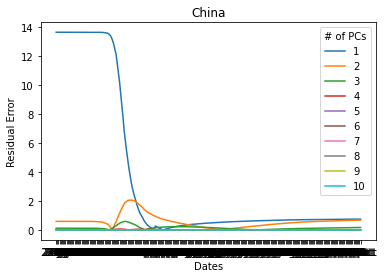

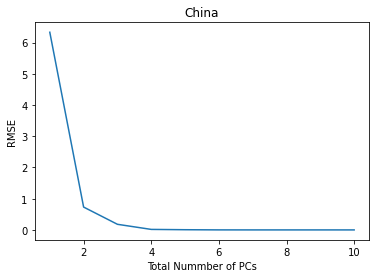

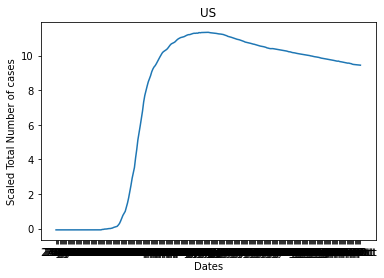

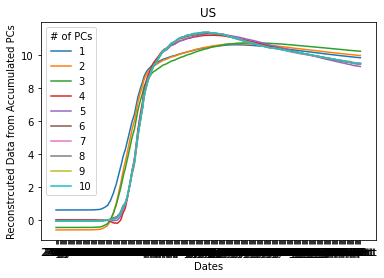

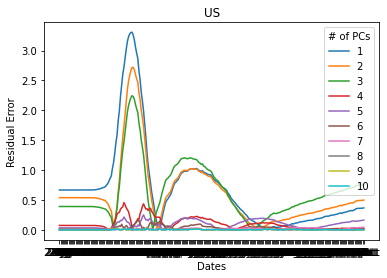

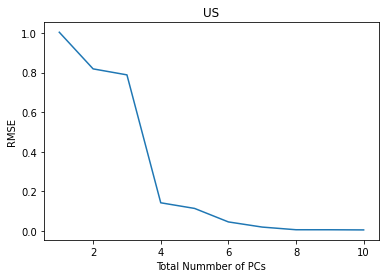

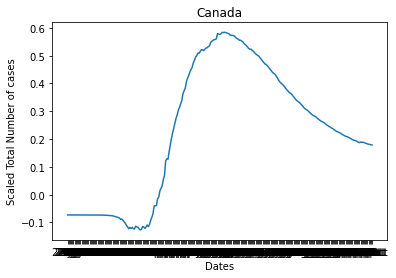

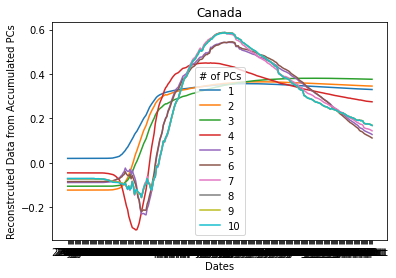

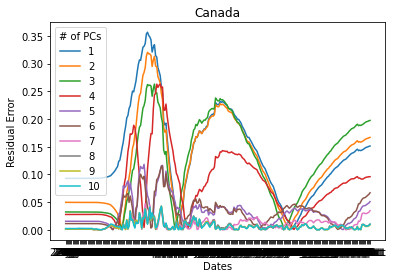

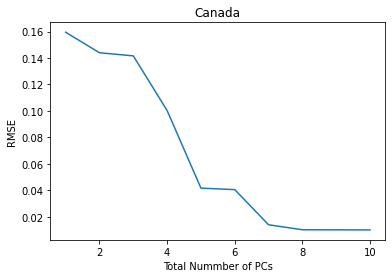

In [ ]:
# Plot results for specified countries
countries = ["China", "US", "Canada"]

for country in countries:
  reconstrcutData(country, death_raw)

# Part 5: MNIST dataset
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  
* Plot the first 10 eigenvectors. What trends do you observe? 


> **Observations: The numbers are all centralized at the 28x28 frame. As we go lower on order of eigenfaces the images become less recognizable nad more grey pixels are observed. This is similar to behaviour in part 2 question 6.**


* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as $n$ plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.).
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. 


> **This highly depends on the image and the number identified in it. Some number are very easy to identify, for example number 0 can be distinguished with only 1 or 2 componenets, while some other such as a cursive 2 or 6 may need up to 20 or more to identify by human eye.**


* With that many components, what would be the compression ratio for a dataset with 1000 images? *Hint: compare the dataset size with a case where we only use principal components and projections* 



> **For a dataset with 1000 images each with 784 features, we have 784,000 total elements. Let's say it takes us 20 componenets to identify the nummber in an image. That is 15,860 elements. That means the image is compressed by 784,000/15,860 = 49.4; about 50 times!**



In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [ ]:
x.shape

(1000, 784)

Label is: 4


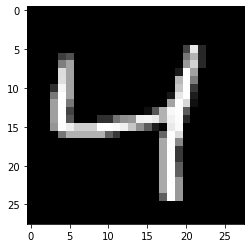

In [ ]:
x.shape
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

In [ ]:
# standardize the data
n, d = x.shape
mu = x.mean(axis=0)
X = x - mu 

if n > d:
  C = np.dot(X.T,X) # covariance matrix
  eigenValues, eigenVectors = np.linalg.eigh(C)
else:
  C = np.dot(X,X.T) # covariance matrix
  eigenValues, eigenVectors = np.linalg.eigh(C)
  eigenVectors = np.dot(X.T, eigenVectors)
  for i in range(n):
      eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])

# sort eigenVectors in descending order by their eigenValue
idx = np.argsort(-eigenValues)
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]

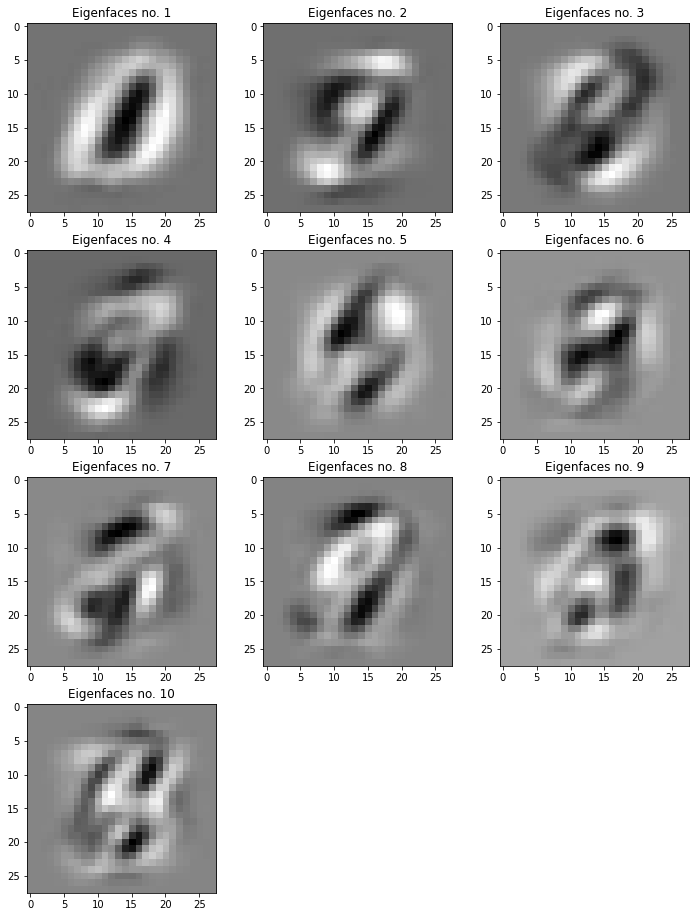

In [ ]:
# plot the first 10 eigenfaces
import math
eigenface_count = 10
ROWS = math.ceil(eigenface_count/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, eigenface_count):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(28, 28), cmap = plt.cm.gray)
    plt.title("Eigenfaces no. %i" %(i+1))

In [ ]:
# Create a function that requires an argument  𝑛  and plots a random image
# from the dataset, as well as  𝑛  plots of its incremental reconstruction 
# (a first reconstruction with PC1, the second with PC1+PC2, the third
# with PC1+PC2+PC3, etc.)

def project (W , X , mu):
    return np.dot (X - mu , W)

def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

def pca(n):
  # plot the random image
  IMAGE_IDX = np.random.randint(1, 1001) # image idx in dataset
  plt.imshow(X[IMAGE_IDX].reshape(28,28), cmap=plt.cm.gray)
  plt.show()

  numEvsSet = np.linspace(1, n, n).astype(int) # these no. of eigenVectors will be used to reconstruct the image.
  COUNT = len(numEvsSet)
  reconImages = []

  for numEvs in numEvsSet:
      P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mu)
      R = reconstruct(eigenVectors[:, 0:numEvs], P, mu)
      reconImages.append(R.reshape(X[0].shape))

  # plot reconstructed images
  ROWS = math.ceil(COUNT/3)
  fig = plt.figure(figsize=(12, ROWS * 4))
  for i in range(0, COUNT):
      plt.subplot(ROWS, 3, i+1)
      plt.imshow(reconImages[i].reshape(28,28), cmap = plt.cm.gray)
      plt.title("Reconstruction:"+ str(numEvsSet[i]) + " Components" )




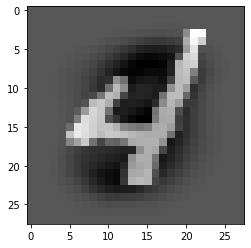

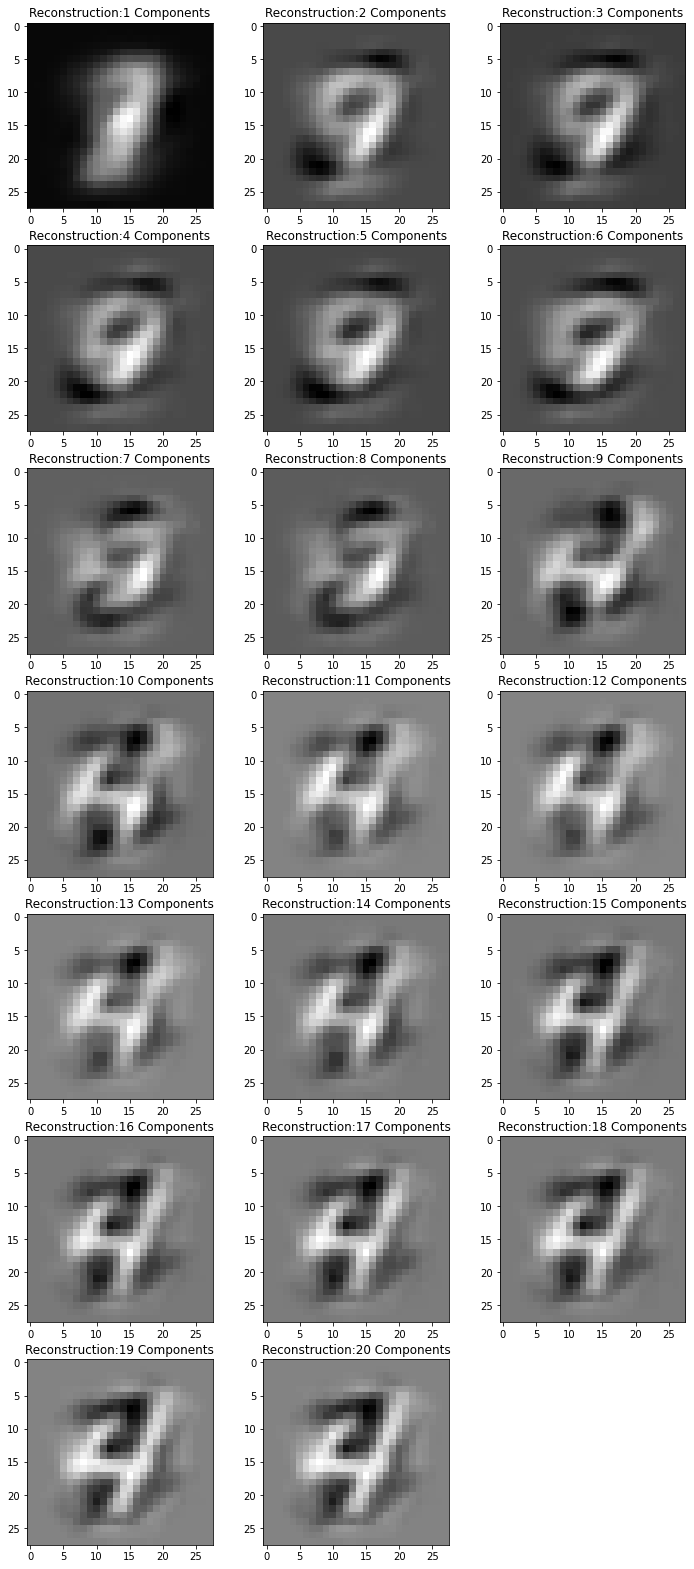

In [ ]:
pca(20)

# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


